<a href="https://colab.research.google.com/github/AbdelrahmanFeteha/medical_appointments_analysis_and_visualisation/blob/main/medical_appointments_analysis_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import statistics
import numpy as np
import pandas as pd
import scipy.stats

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Import the data
data = pd.read_csv("Medical Appointments.csv")
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,1,No


## Data Overview and Cleaning

In [ ]:
#Let's analyse the type of our data
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [ ]:
#Check for missing values
print(data.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


We can see that there are no missing values

In [ ]:
#Check for duplicate values
print("Duplicate rows = ", data.duplicated().sum())

Duplicate rows =  0


We made a pie chart to see the distribution of males and females and it showed that there is a male majority

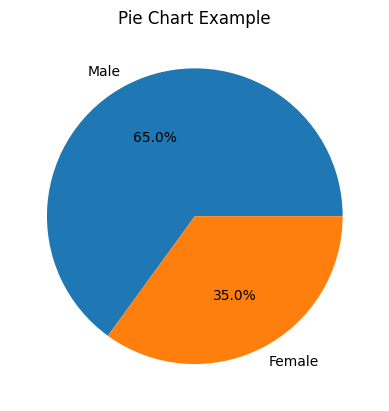

In [ ]:
#What is the distribution of gender among patients?
import matplotlib.pyplot as plt   #uses lists

gender_rows = data['Gender'].value_counts() #this will get us the size of the population
labels_1 = ["Male", "Female"]

#plotting the pie chart
plt.pie(gender_rows, labels = labels_1, autopct='%1.1f%%')  #to 1 decimal place

plt.title('Pie Chart Example')
plt.show()

We build a box plot to check for outliers and we find one aged 100+

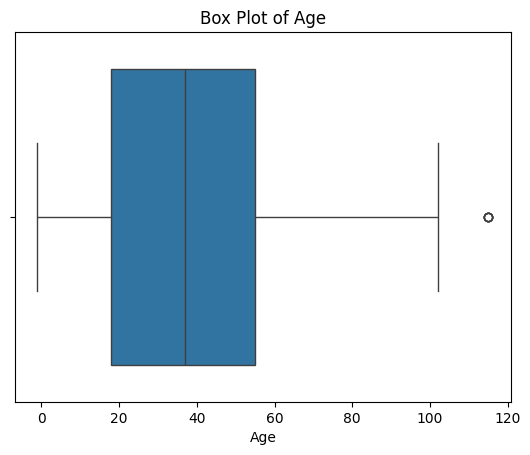

In [ ]:
# Are there any outliers or inconsistencies in age distribution?
import seaborn as sns

data_to_plot = data['Age']

#create the box plot
sns.boxplot(x=data_to_plot)

#additing title and labels
plt.title('Box Plot of Age')
plt.xlabel('Age')

#display the plot
plt.show()

Here we are analyzing the distribution of the appointment days, months and days of month

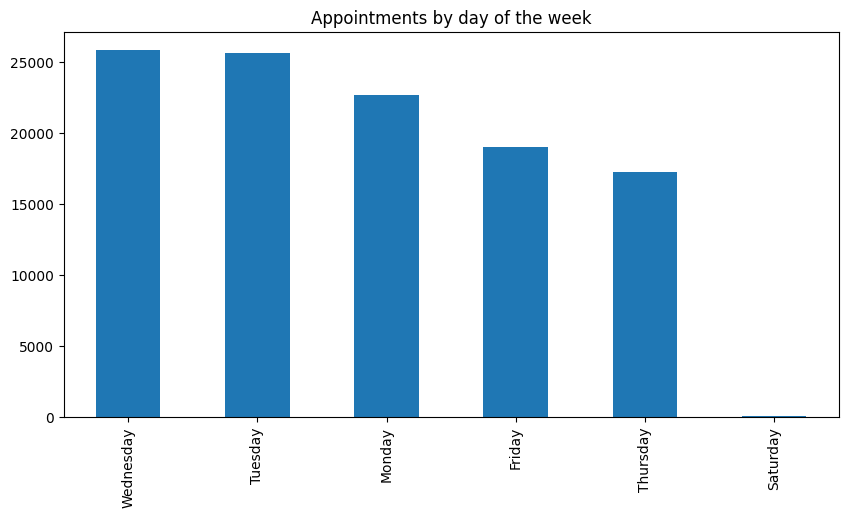

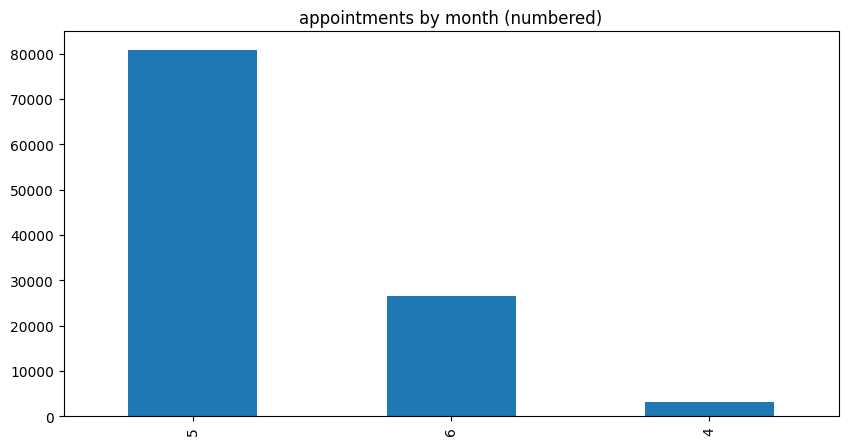

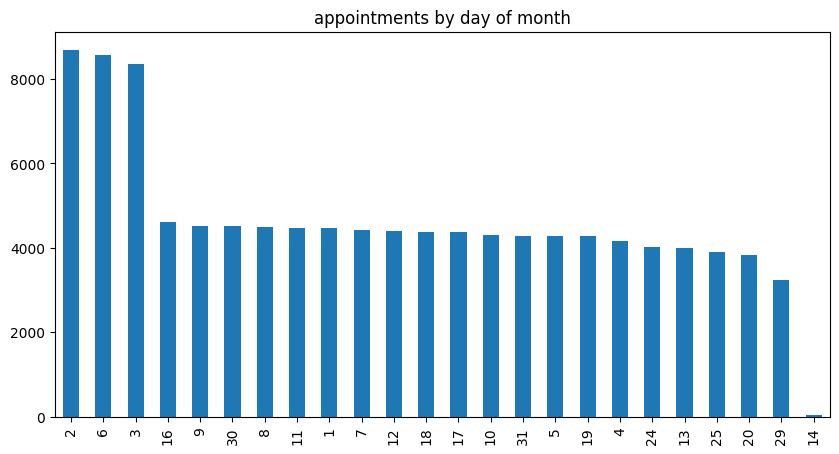

In [ ]:
#How are appointments distributed over different days of the week/month? o Is there any seasonality in appointment scheduling?
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

#getting the day of the week,
data['ScheduledDayOfWeek'] = data['ScheduledDay'].dt.day_name()
data['AppointmentDayOfWeek'] = data['AppointmentDay'].dt.day_name()

#getting the month
data['ScheduledMonth'] = data['ScheduledDay'].dt.month
data['AppointmentMonth'] = data['AppointmentDay'].dt.month

#getting day of month
data['ScheduledDayOfMonth'] = data['ScheduledDay'].dt.day
data['AppointmentDayOfMonth'] = data['AppointmentDay'].dt.day
#======================================================================================

#distribution of the appointments by day of the week
data.AppointmentDayOfWeek.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Appointments by day of the week")
plt.ylabel('')
plt.xlabel('')
plt.show()


#distribution of the appointments by month
data.AppointmentMonth.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("appointments by month (numbered)")
plt.ylabel('')
plt.xlabel('')
plt.show()


#distribution of the appointments by day of month
data.AppointmentDayOfMonth.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("appointments by day of month")
plt.ylabel('')
plt.xlabel('')

plt.show()




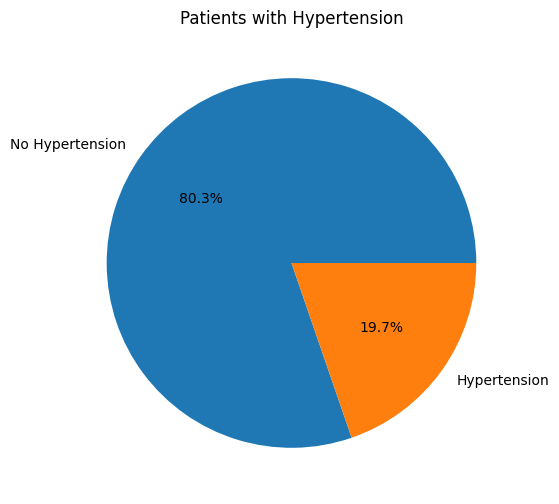

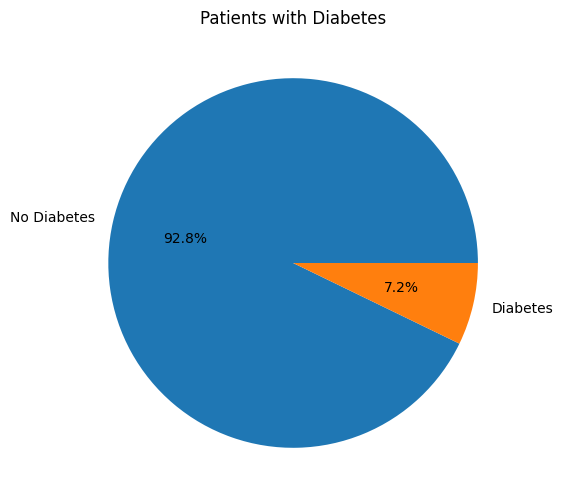

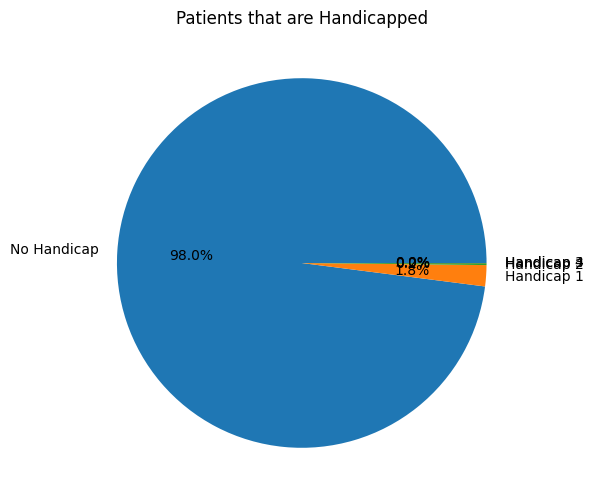

In [ ]:
#Hyperterntion --> note that the column is misspelt
data.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

#
hypertension_counts = data['Hypertension'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(hypertension_counts, labels=['No Hypertension', 'Hypertension'], autopct='%1.1f%%')
plt.title('Patients with Hypertension')
plt.show()

#Analyzing diabetes
diabetes_counts=data['Diabetes'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(diabetes_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%')
plt.title('Patients with Diabetes')
plt.show()

#Handicap
handicap_counts=data['Handcap'].value_counts()
plt.figure(figsize=(8,6))
#there could be more than one type of handicap
labels_handicap = [f'Handicap {i}' if i!= 0 else 'No Handicap' for i in handicap_counts.index]
plt.pie(handicap_counts, labels=labels_handicap, autopct='%1.1f%%')
plt.title('Patients that are Handicapped')
plt.show()

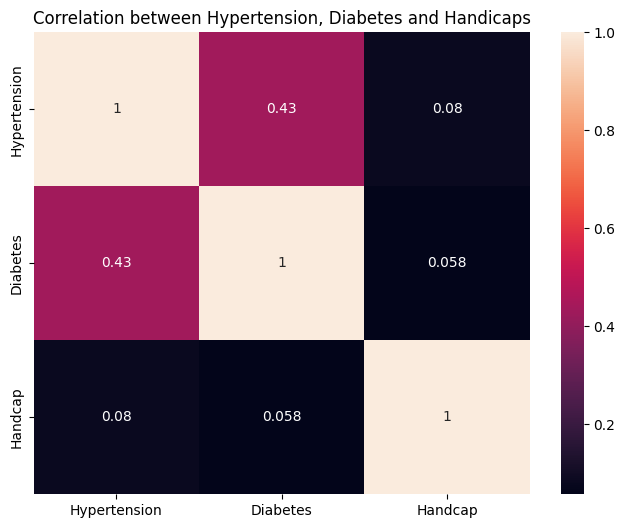

In [ ]:
 #Are there any correlations between these conditions?'--> Heatmap

conditions = data[['Hypertension', 'Diabetes', 'Handcap']]

correlation = conditions.corr()

#plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True)
plt.title('Correlation between Hypertension, Diabetes and Handicaps')
plt.show()

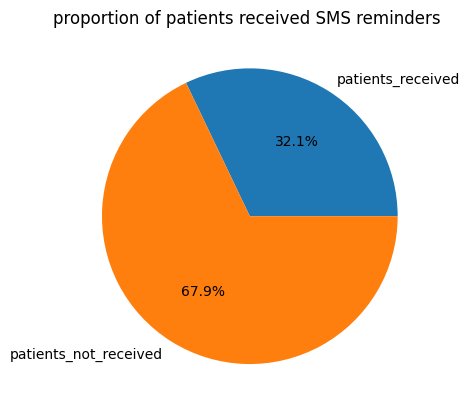

Proportion of Patients that receive SMS =  32.10256317460892 %


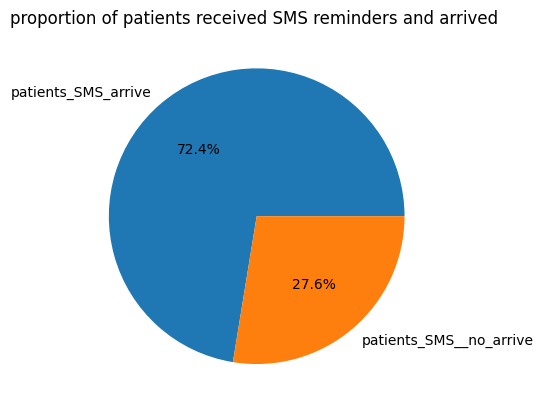

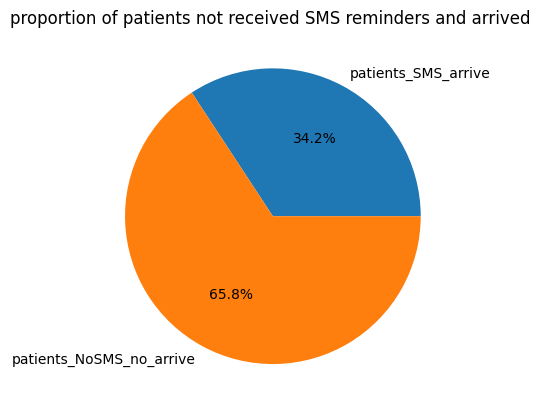

In [ ]:
#Effect of Reminder SMS: o What proportion of patients received SMS reminders? o Did patients who received reminders show up more often than those who didn't?

#proportion of patients that received SMS
total_patients = len(data)
patients_received = data['SMS_received'].sum()
patients_not_received = total_patients - patients_received

plt.pie([patients_received,patients_not_received], labels = ['patients_received', 'patients_not_received'], autopct='%1.1f%%')
plt.title("proportion of patients received SMS reminders ")
plt.show()
proportion = proportion_that_receive = 100 * patients_received / total_patients
print("Proportion of Patients that receive SMS = ",proportion, '%')

#Did patients who received reminders show up more often than those who didn't?
patients_NoSMS_arrive = len(data[(data['SMS_received'] == 0) & (data['No-show'] == 'No')])
patients_SMS_arrive = len(data[(data['SMS_received'] == 1) & (data['No-show'] == 'No')])


patients_SMS__no_arrive =  patients_received - patients_SMS_arrive
patients_NoSMS_no_arrive = patients_not_received - patients_SMS_arrive

plt.pie([patients_SMS_arrive,patients_SMS__no_arrive], labels = ['patients_SMS_arrive', 'patients_SMS__no_arrive'], autopct='%1.1f%%')
plt.title("proportion of patients received SMS reminders and arrived ")
plt.show()



plt.pie([patients_SMS_arrive,patients_NoSMS_no_arrive], labels = ['patients_SMS_arrive', 'patients_NoSMS_no_arrive'], autopct='%1.1f%%')
plt.title("proportion of patients not received SMS reminders and arrived ")
plt.show()



Number of patients with scholarship: 10861


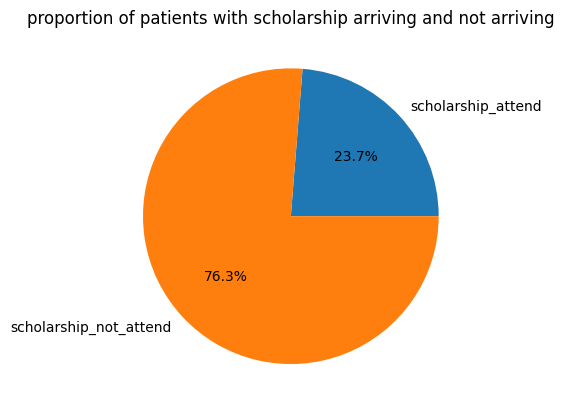

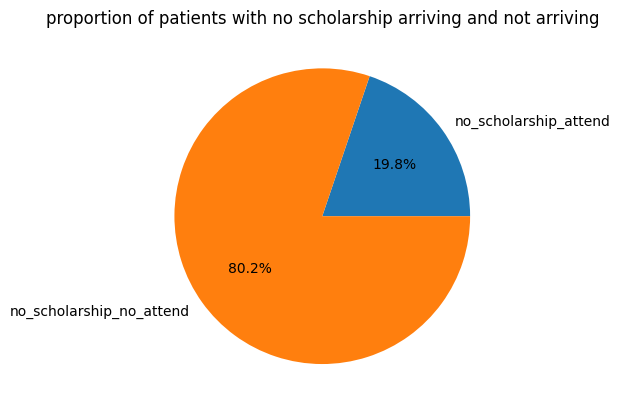

In [ ]:
# Financial Aid and Attendance: o How many patients received scholarships?
# o Is there a difference in attendance between patients receiving financial aid and those who don't?

# We will find the number of patients with scholarships arriving and not arrving
# and the number of patients with no scholarship arriving and not arrving then compare the percentages of each in a pie chart
scholarship = data['Scholarship'].sum()
print("Number of patients with scholarship:", scholarship)
scholarship_attend = len(data[(data['Scholarship'] == 1) & (data['No-show'] == 'Yes')])
scholarship_not_attend = len(data[(data['Scholarship'] == 1) & (data['No-show'] == 'No')])

no_scholarship_attend = len(data[(data['Scholarship'] == 0) & (data['No-show'] == 'Yes')])
no_scholarship_no_attend = len(data[(data['Scholarship'] == 0) & (data['No-show'] == 'No')])

plt.pie([scholarship_attend, scholarship_not_attend], labels = ['scholarship_attend', 'scholarship_not_attend'], autopct='%1.1f%%')
plt.title("proportion of patients with scholarship arriving and not arriving")
plt.show()

plt.pie([no_scholarship_attend, no_scholarship_no_attend], labels = ['no_scholarship_attend', 'no_scholarship_no_attend'], autopct='%1.1f%%')
plt.title("proportion of patients with no scholarship arriving and not arriving")
plt.show()

Text(0.5, 0, 'Neighbourhood')

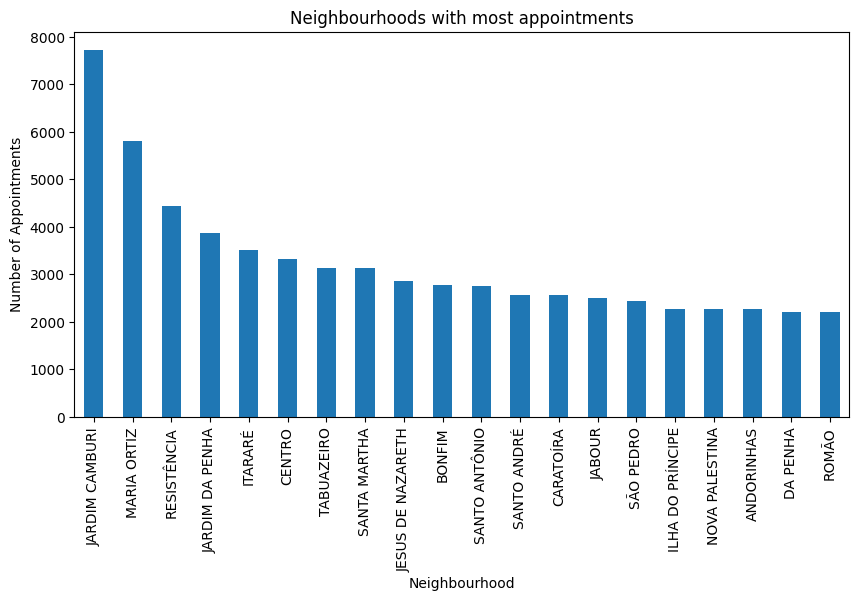

In [ ]:
# Neighborhood Analysis: o Which neighborhoods have the highest number of appointments? o Is there any correlation between neighborhood and attendance?

data.Neighbourhood.value_counts().nlargest(20).plot(kind = 'bar', figsize = (10,5))
plt.title("Neighbourhoods with most appointments")
plt.ylabel("Number of Appointments")
plt.xlabel("Neighbourhood")

In [ ]:
# No-show Analysis: o What is the overall no-show rate for appointments? o

total_no_show = data['No-show'].value_counts(normalize = True)['Yes']
print("The overall no-show rate =",total_no_show * 100,"%")

# Are there any patterns or trends in no-shows based on demographics or other factors?--> Let's analyse: Gender, age, diabetes, handicap, scholarship, SMS
gender_no_show = data.groupby('Gender')['No-show'].value_counts(normalize=True).unstack()['Yes']
print("\nNo Show Rate by Gender:", gender_no_show)


age_no_show = data.groupby('Age')['No-show'].value_counts(normalize=True).unstack()['Yes']
print("\nNo Show Rate by Age:", age_no_show)

diabetes_no_show= data.groupby('Diabetes')['No-show'].value_counts(normalize=True).unstack()['Yes']
print("\nNo Show Rate by Age:", diabetes_no_show)

handicap_no_show= data.groupby('Handcap')['No-show'].value_counts(normalize=True).unstack()['Yes']
print("\nNo Show Rate by Handicap:", handicap_no_show)

scholarship_no_show= data.groupby('Scholarship')['No-show'].value_counts(normalize=True).unstack()['Yes']
print("\nNo Show Rate by scholarship:", scholarship_no_show)

sms_no_show= data.groupby('SMS_received')['No-show'].value_counts(normalize=True).unstack()['Yes']
print("\nNo Show Rate by SMS_received:", sms_no_show)


The overall no-show rate = 20.193255946510806 %

No Show Rate by Gender: Gender
F    0.203146
M    0.199679
Name: Yes, dtype: float64

No Show Rate by Age: Age
-1           NaN
 0      0.180559
 1      0.182578
 2      0.155748
 3      0.183080
          ...   
 98     0.166667
 99          NaN
 100         NaN
 102         NaN
 115    0.600000
Name: Yes, Length: 104, dtype: float64

No Show Rate by Age: Diabetes
0    0.203628
1    0.180033
Name: Yes, dtype: float64

No Show Rate by Handicap: Handcap
0    0.202353
1    0.179236
2    0.202186
3    0.230769
4    0.333333
Name: Yes, dtype: float64

No Show Rate by scholarship: Scholarship
0    0.198072
1    0.237363
Name: Yes, dtype: float64

No Show Rate by SMS_received: SMS_received
0    0.167033
1    0.275745
Name: Yes, dtype: float64
